In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('../data/sales_train_evaluation.csv.zip')
cal = pd.read_csv('../data/calendar.csv')

In [3]:
all_sum = data.iloc[:,6:].sum().values

In [4]:
df = pd.DataFrame()
df['y'] = all_sum
df['d'] = [f'd_{i}' for i in range(1,1942)]

In [5]:
df = pd.merge(df,cal[['date','d']],how='left')

In [6]:
df = df.rename(columns={'date':'ds'})

In [7]:
df.head()

,y,d,ds
0,32631,d_1,2011-01-29
1,31749,d_2,2011-01-30
2,23783,d_3,2011-01-31
3,25412,d_4,2011-02-01
4,19146,d_5,2011-02-02


In [27]:
model = Prophet()
model.add_seasonality(name='monthly', period=28, fourier_order=5)
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.fit(df)

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_data = model.make_future_dataframe(periods=28, freq='D')
forecast_data = model.predict(future_data) #予測

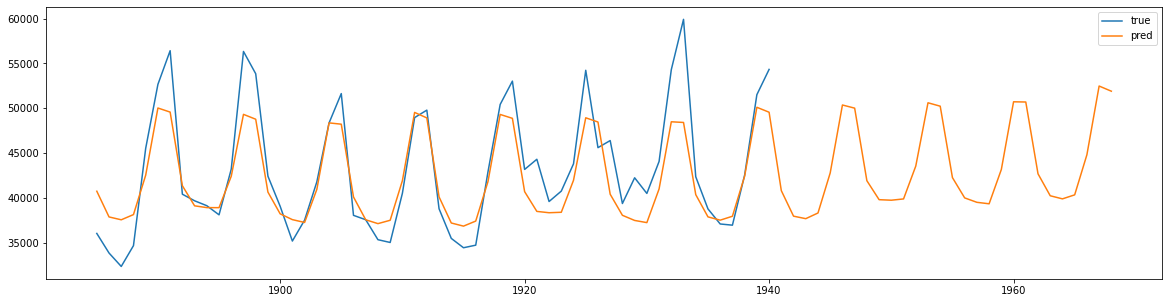

In [29]:
plt.figure(figsize=(20,5))
plt.plot(df['y'][-56:],label='true')
plt.plot(forecast_data['yhat'][-84:],label='pred')
plt.legend()
plt.show()

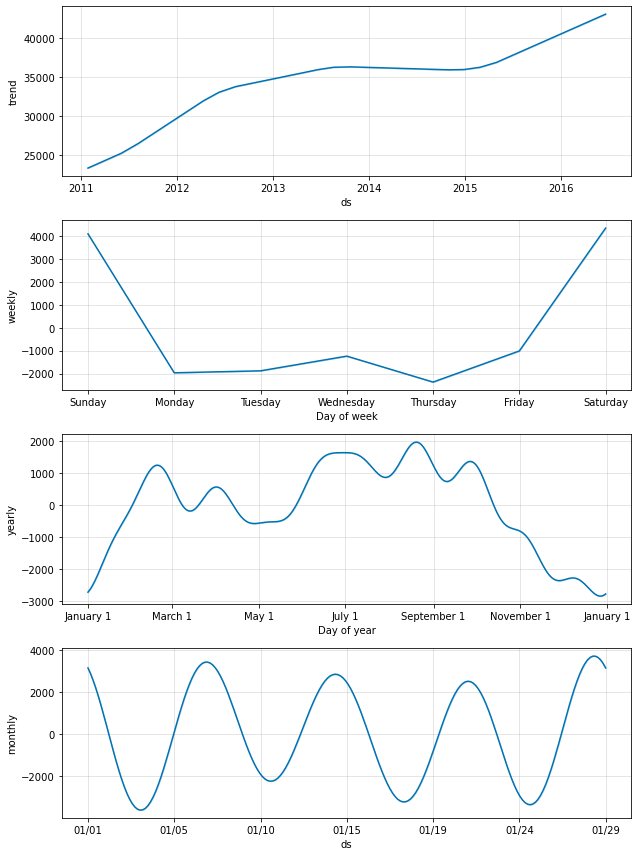

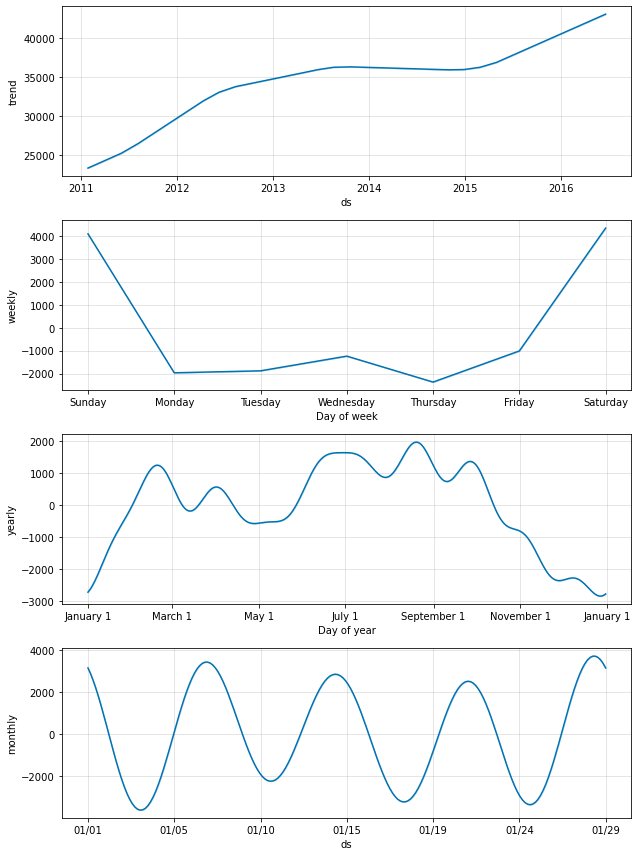

In [36]:
model.plot_components(forecast_data)